In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

In [17]:
db_22 = pd.read_fwf('./DATA/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
db_23 = pd.read_fwf('./DATA/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
db_24 = pd.read_fwf('./DATA/COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

In [20]:
db_22.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2024BOVESPA,NaN,NaN
1,20240102,02AALR3,1020.0,850.0
2,20240102,02ABCB4,2398.0,2279.0
3,20240102,02ABEV3,1372.0,1359.0
4,20240102,02BBDC3,1526.0,1498.0


In [21]:
db_23.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2023BOVESPA,NaN,NaN
1,20230102,02NEOE3,1540.0,1498.0
2,20230102,02NEXP3,31.0,29.0
3,20230102,02NGRD3,148.0,143.0
4,20230102,02NINJ3,270.0,269.0


In [22]:
db_24.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
0,COTAHIST,.2024BOVESPA,NaN,NaN
1,20240102,02AALR3,1020.0,850.0
2,20240102,02ABCB4,2398.0,2279.0
3,20240102,02ABEV3,1372.0,1359.0
4,20240102,02BBDC3,1526.0,1498.0


In [25]:
db_22.dropna(inplace=True)
db_23.dropna(inplace=True)
db_24.dropna(inplace=True)

In [24]:
#Nan Retirados, ta vendo fravo:
db_22.head()

,Data,Codigo,Preco_Abertura,Preco_Fechamento
1,20220103,02GNDI3,5970.0,5727.0
2,20220103,02ABEV3,1542.0,1515.0
3,20220103,02MODL11,1080.0,1071.0
4,20220103,02TASA4,2500.0,2428.0
5,20220103,02CRIV4,568.0,557.0


In [34]:
# Filtra pela ação ABEV3, garantindo que seja exatamente ABEV3 (sem caracteres adicionais)
db_22_filtrado= db_22[db_22['Codigo'].str.endswith('ABEV3')]
db_23_filtrado= db_23[db_23['Codigo'].str.endswith('ABEV3')]
db_24_filtrado= db_24[db_24['Codigo'].str.endswith('ABEV3')]

In [35]:
print(db_22_filtrado)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
2        20220103  02ABEV3          1542.0            1515.0
2354     20220119  02ABEV3          1465.0            1439.0
2422     20220221  02ABEV3          1483.0            1445.0
5668     20220204  02ABEV3          1442.0            1417.0
6561     20220104  02ABEV3          1532.0            1504.0
...           ...      ...             ...               ...
1221393  20221202  02ABEV3          1615.0            1595.0
1228746  20221027  02ABEV3          1525.0            1521.0
1229043  20221122  02ABEV3          1570.0            1550.0
1229143  20221111  02ABEV3          1576.0            1566.0
1231359  20221109  02ABEV3          1661.0            1642.0

[250 rows x 4 columns]


In [36]:
print(db_23_filtrado)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
21       20230102  02ABEV3          1440.0            1402.0
1655     20230103  02ABEV3          1416.0            1411.0
3182     20230104  02ABEV3          1428.0            1408.0
4849     20230105  02ABEV3          1427.0            1414.0
6534     20230106  02ABEV3          1430.0            1416.0
...           ...      ...             ...               ...
1344806  20231221  02ABEV3          1382.0            1359.0
1346566  20231222  02ABEV3          1369.0            1366.0
1348089  20231226  02ABEV3          1372.0            1369.0
1349818  20231227  02ABEV3          1378.0            1372.0
1351367  20231228  02ABEV3          1380.0            1373.0

[248 rows x 4 columns]


In [37]:
print(db_24_filtrado)

            Data   Codigo  Preco_Abertura  Preco_Fechamento
3       20240102  02ABEV3          1372.0            1359.0
1779    20240103  02ABEV3          1367.0            1357.0
3821    20240104  02ABEV3          1360.0            1352.0
5414    20240105  02ABEV3          1362.0            1353.0
7117    20240108  02ABEV3          1361.0            1358.0
...          ...      ...             ...               ...
95704   20240322  02ABEV3          1256.0            1237.0
97104   20240325  02ABEV3          1240.0            1223.0
98858   20240326  02ABEV3          1220.0            1217.0
100775  20240327  02ABEV3          1236.0            1230.0
102210  20240328  02ABEV3          1238.0            1236.0

[61 rows x 4 columns]


In [38]:
# Convertendo a coluna 'Data' para datetime
db_22_filtrado['Data'] = pd.to_datetime(db_22_filtrado['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
db_22_filtrado['Ano'] = db_22_filtrado['Data'].dt.year
db_22_filtrado['Mes'] = db_22_filtrado['Data'].dt.month
db_22_filtrado['Dia'] = db_22_filtrado['Data'].dt.day

print(db_22_filtrado)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
2       2022-01-03  02ABEV3          1542.0            1515.0  2022    1    3
2354    2022-01-19  02ABEV3          1465.0            1439.0  2022    1   19
2422    2022-02-21  02ABEV3          1483.0            1445.0  2022    2   21
5668    2022-02-04  02ABEV3          1442.0            1417.0  2022    2    4
6561    2022-01-04  02ABEV3          1532.0            1504.0  2022    1    4
...            ...      ...             ...               ...   ...  ...  ...
1221393 2022-12-02  02ABEV3          1615.0            1595.0  2022   12    2
1228746 2022-10-27  02ABEV3          1525.0            1521.0  2022   10   27
1229043 2022-11-22  02ABEV3          1570.0            1550.0  2022   11   22
1229143 2022-11-11  02ABEV3          1576.0            1566.0  2022   11   11
1231359 2022-11-09  02ABEV3          1661.0            1642.0  2022   11    9

[250 rows x 7 columns]


C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\126720766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_22_filtrado['Data'] = pd.to_datetime(db_22_filtrado['Data'], format='%Y%m%d')
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\126720766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_22_filtrado['Ano'] = db_22_filtrado['Data'].dt.year
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\126720766.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [39]:
# Convertendo a coluna 'Data' para datetime
db_23_filtrado['Data'] = pd.to_datetime(db_23_filtrado['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
db_23_filtrado['Ano'] = db_23_filtrado['Data'].dt.year
db_23_filtrado['Mes'] = db_23_filtrado['Data'].dt.month
db_23_filtrado['Dia'] = db_23_filtrado['Data'].dt.day

print(db_23_filtrado)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
21      2023-01-02  02ABEV3          1440.0            1402.0  2023    1    2
1655    2023-01-03  02ABEV3          1416.0            1411.0  2023    1    3
3182    2023-01-04  02ABEV3          1428.0            1408.0  2023    1    4
4849    2023-01-05  02ABEV3          1427.0            1414.0  2023    1    5
6534    2023-01-06  02ABEV3          1430.0            1416.0  2023    1    6
...            ...      ...             ...               ...   ...  ...  ...
1344806 2023-12-21  02ABEV3          1382.0            1359.0  2023   12   21
1346566 2023-12-22  02ABEV3          1369.0            1366.0  2023   12   22
1348089 2023-12-26  02ABEV3          1372.0            1369.0  2023   12   26
1349818 2023-12-27  02ABEV3          1378.0            1372.0  2023   12   27
1351367 2023-12-28  02ABEV3          1380.0            1373.0  2023   12   28

[248 rows x 7 columns]


C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3710496035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_23_filtrado['Data'] = pd.to_datetime(db_23_filtrado['Data'], format='%Y%m%d')
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3710496035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_23_filtrado['Ano'] = db_23_filtrado['Data'].dt.year
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3710496035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [40]:
# Convertendo a coluna 'Data' para datetime
db_24_filtrado['Data'] = pd.to_datetime(db_24_filtrado['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
db_24_filtrado['Ano'] = db_24_filtrado['Data'].dt.year
db_24_filtrado['Mes'] = db_24_filtrado['Data'].dt.month
db_24_filtrado['Dia'] = db_24_filtrado['Data'].dt.day

print(db_24_filtrado)

             Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
3      2024-01-02  02ABEV3          1372.0            1359.0  2024    1    2
1779   2024-01-03  02ABEV3          1367.0            1357.0  2024    1    3
3821   2024-01-04  02ABEV3          1360.0            1352.0  2024    1    4
5414   2024-01-05  02ABEV3          1362.0            1353.0  2024    1    5
7117   2024-01-08  02ABEV3          1361.0            1358.0  2024    1    8
...           ...      ...             ...               ...   ...  ...  ...
95704  2024-03-22  02ABEV3          1256.0            1237.0  2024    3   22
97104  2024-03-25  02ABEV3          1240.0            1223.0  2024    3   25
98858  2024-03-26  02ABEV3          1220.0            1217.0  2024    3   26
100775 2024-03-27  02ABEV3          1236.0            1230.0  2024    3   27
102210 2024-03-28  02ABEV3          1238.0            1236.0  2024    3   28

[61 rows x 7 columns]


C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3916756215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_24_filtrado['Data'] = pd.to_datetime(db_24_filtrado['Data'], format='%Y%m%d')
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3916756215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_24_filtrado['Ano'] = db_24_filtrado['Data'].dt.year
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\3916756215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [41]:
def plot_df(df,tendencia,sazonalidade,ruido,title,column):
    # Plot dos componentes de decomposição
    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df[column], label='Série Original')
    plt.plot(df.index, tendencia, label='Tendência', linestyle='--')
    plt.plot(df.index, sazonalidade, label='Sazonalidade', linestyle='--')
    plt.plot(df.index, ruido, label='Ruído', linestyle='--')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.title(title)
    plt.legend()
    plt.show()

                 Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  \
Data                                                                          
2022-10-04 2022-10-04  02ABEV3          1650.0            1609.0  2022   10   
2022-10-05 2022-10-05  02ABEV3          1631.0            1595.0  2022   10   
2022-10-06 2022-10-06  02ABEV3          1625.0            1598.0  2022   10   
2022-11-04 2022-11-04  02ABEV3          1617.0            1604.0  2022   11   
2022-11-07 2022-11-07  02ABEV3          1633.0            1631.0  2022   11   
2022-11-08 2022-11-08  02ABEV3          1626.0            1619.0  2022   11   
2022-11-09 2022-11-09  02ABEV3          1661.0            1642.0  2022   11   
2022-12-02 2022-12-02  02ABEV3          1615.0            1595.0  2022   12   
2022-12-05 2022-12-05  02ABEV3          1603.0            1597.0  2022   12   

            Dia   Suavizacao   Z-score  
Data                                    
2022-10-04    4  1553.030065  2.203338  
2022-10

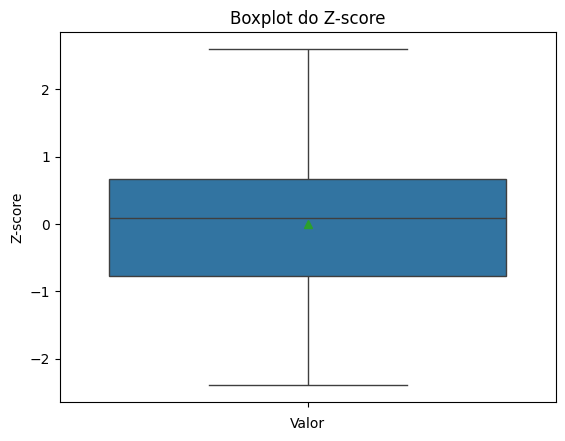

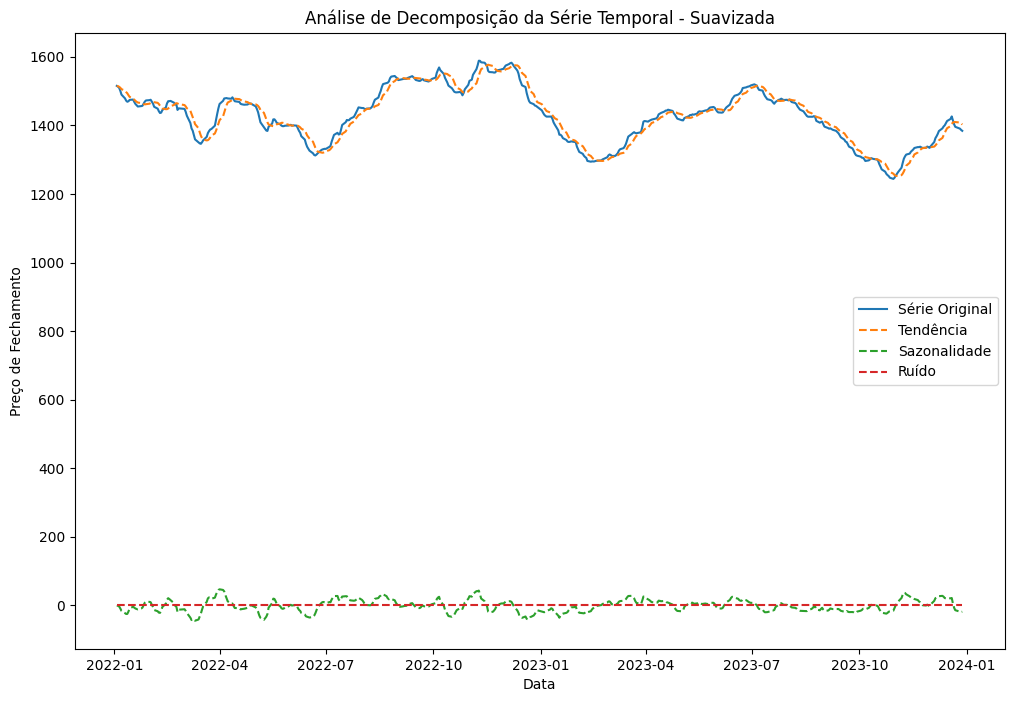

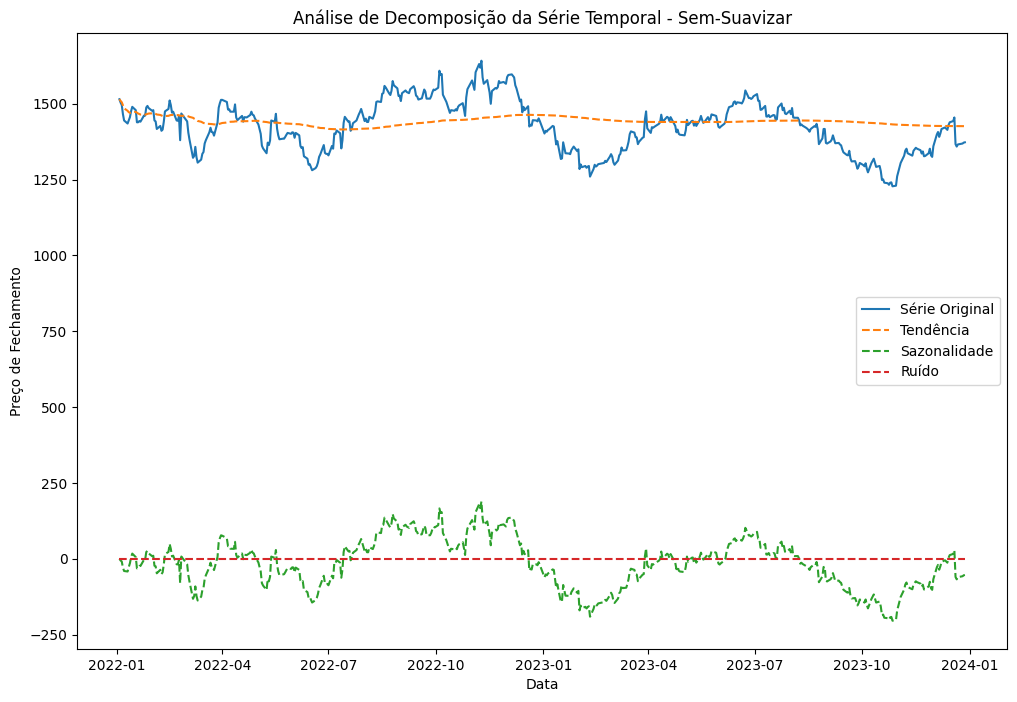

Empty DataFrame
Columns: [Data, Codigo, Preco_Abertura, Preco_Fechamento, Ano, Mes, Dia, Suavizacao, Z-score]
Index: []


C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\1371137627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\1371137627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ano'] = df['Data'].dt.year
C:\Users\1-22-11609\AppData\Local\Temp\ipykernel_4160\1371137627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

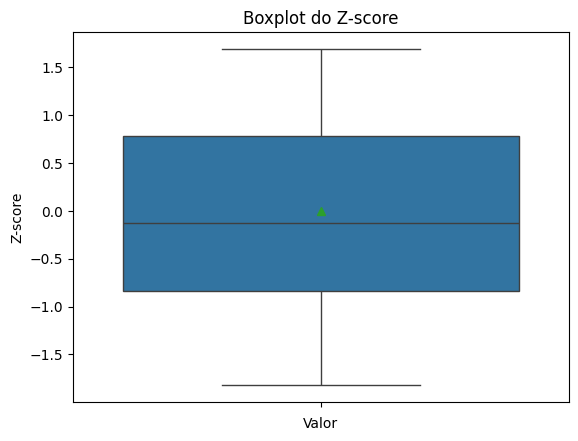

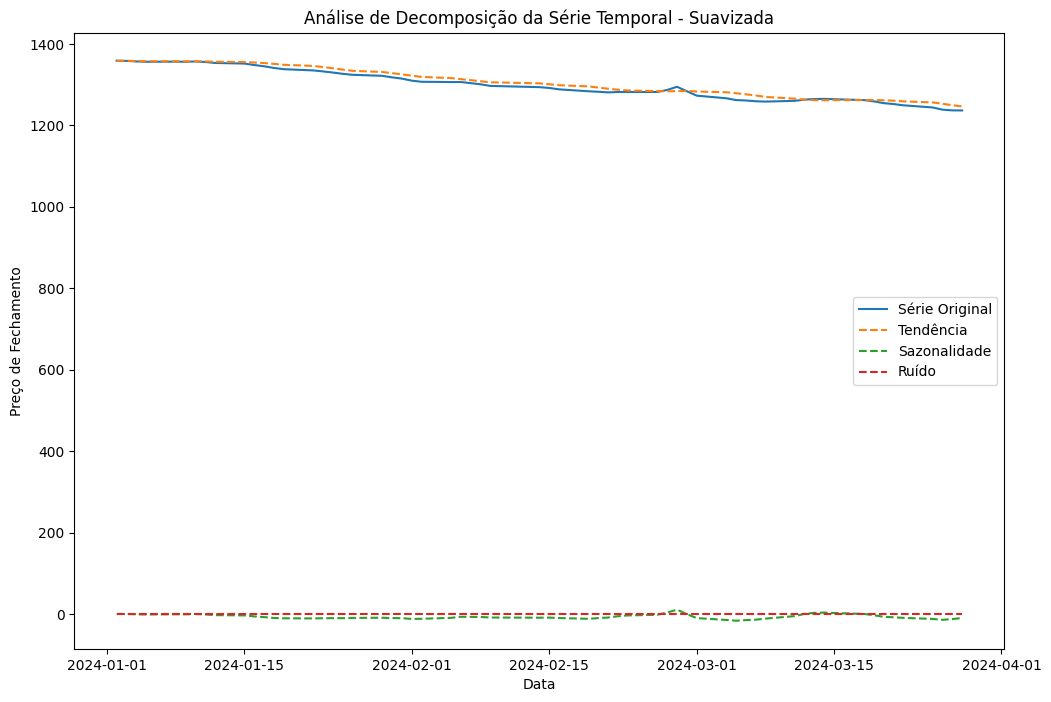

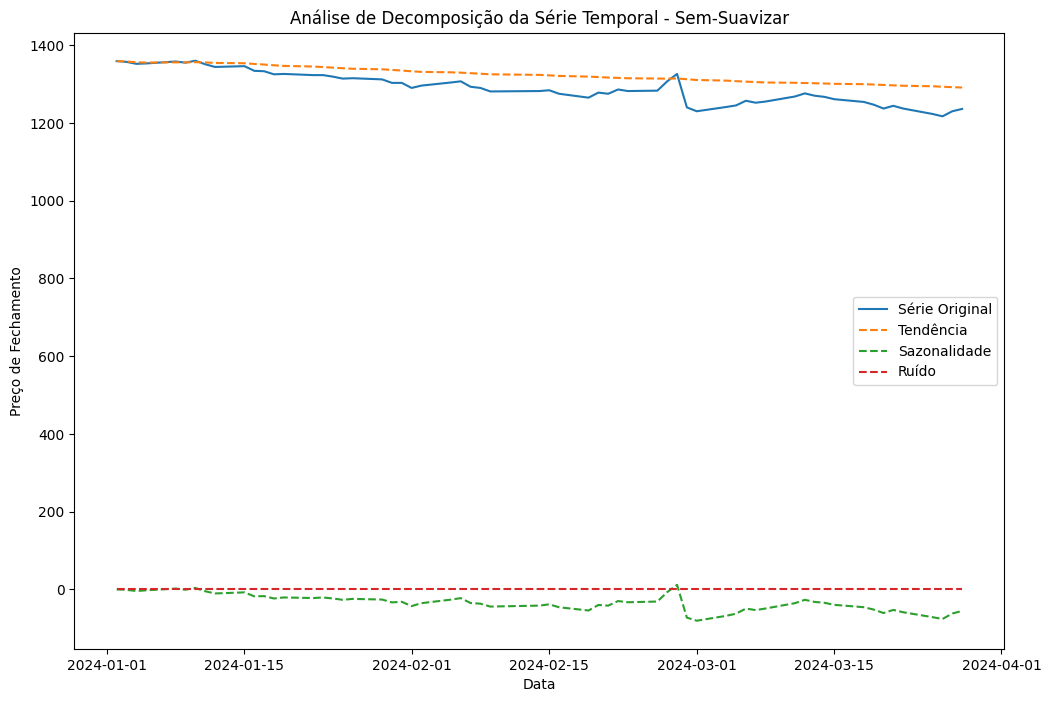

In [42]:
import seaborn as sns
def preprocessamento_df(df):
    # Formatando as datas
    df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')

    # Extraindo ano, mês e dia
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month
    df['Dia'] = df['Data'].dt.day
    
    # Ordenar o DataFrame pela data
    df = df.sort_values(by='Data')
    df.set_index(df['Data'], inplace=True)

    
    # Suavização
    df['Suavizacao'] = df['Preco_Fechamento'].ewm(alpha=0.2, adjust=False).mean()
    
    # Componentes de Decomposição Sem-Suavizar
    tendencia = df['Preco_Fechamento'].rolling(window=len(df['Preco_Fechamento']), min_periods=1).mean()
    sazonalidade = df['Preco_Fechamento'] - tendencia
    ruido = df['Preco_Fechamento'] - (tendencia + sazonalidade)

    # Componentes de Decomposição Suavizado
    linhas = df.shape[1]
    tendencia_suavizada = df['Suavizacao'].rolling(window=linhas, min_periods=1).mean()
    sazonalidade_suavizada = df['Suavizacao'] - tendencia_suavizada
    ruido_suavizado = df['Suavizacao'] - (tendencia_suavizada + sazonalidade_suavizada)

    # Calcular a média e o desvio padrão
    mean_price = df['Preco_Fechamento'].mean()
    std_price = df['Preco_Fechamento'].std()

    # Calcular o Z-score
    df['Z-score'] = (df['Preco_Fechamento'] - mean_price) / std_price

    #Outliers
    threshold = 2
    outliers = df[df['Z-score'] > threshold]
    print(outliers)
    sns.boxplot(
        y = "Z-score",
        showmeans=True,  # Exibe a média como um diamante no gráfico
        data=df
    )

    # Adicione título e eixos rotulados (opcional)
    plt.title("Boxplot do Z-score")
    plt.ylabel("Z-score")
    plt.xlabel("Valor")

    # Exiba o gráfico
    plt.show()

    #Plots Sem
    plot_df(df,tendencia_suavizada,sazonalidade_suavizada,ruido_suavizado,'Análise de Decomposição da Série Temporal - Suavizada','Suavizacao')
    plot_df(df,tendencia,sazonalidade,ruido,'Análise de Decomposição da Série Temporal - Sem-Suavizar','Preco_Fechamento')

    return df

# Aplicando a função preprocessamento_df nos DataFrames mxrf11_df1 e mxrf11_df2
df_treino = preprocessamento_df(pd.concat([db_22_filtrado, db_23_filtrado]))
df_teste = preprocessamento_df(db_24_filtrado)

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

def modelo(colunm):
    df_total = pd.concat([df_treino, df_teste])

    # Definindo o ponto de divisão
    ponto_divisao = len(df_treino)

    # Criando o novo dataframe de treino e teste
    novo_df_treino = df_total[:ponto_divisao]
    novo_df_teste = df_total[ponto_divisao:]

    # Treinando o modelo com o novo dataframe de treino
    modelo = ARIMA(novo_df_treino[colunm], order=(5,1,0))
    modelo_treinado = modelo.fit()

    # Fazendo a previsão com o novo dataframe de teste
    previsao = modelo_treinado.predict(start=len(novo_df_treino), end=len(novo_df_treino) + len(novo_df_teste) - 1, typ='levels')
    previsao.index = novo_df_teste.index
    novo_df_teste['Previsao'] = previsao
    # Avaliação da Acurácia
    mse = mean_squared_error(novo_df_teste[colunm], previsao)
    rmse = np.sqrt(mse)
    print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
    novo_df_teste.head(20)
    describe = df_total[colunm].describe()
    print(describe)

    metade_std = df_total[colunm].std() / 2
    um_terco_std = df_total[colunm].std() / 3
    # Comparando o RMSE com o desvio padrão, a metade e um terço do desvio padrão
    if rmse > df_total[colunm].std():
        print("Modelo ruim")
    elif rmse > metade_std:
        print("Modelo ruim")
    elif rmse <= metade_std and rmse > um_terco_std:
        print("Modelo médio")
    else:
        print("Modelo bom")

modelo('Preco_Fechamento')
modelo('Suavizacao')

C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul

Raiz do Erro Quadrático Médio (RMSE): 90.1018955408431
count     559.000000
mean     1411.443649
std        89.930738
min      1217.000000
25%      1337.000000
50%      1418.000000
75%      1475.000000
max      1642.000000
Name: Preco_Fechamento, dtype: float64
Modelo ruim
Raiz do Erro Quadrático Médio (RMSE): 83.32783163288444
count     559.000000
mean     1413.255729
std        84.840184
min      1236.815840
25%      1345.115938
50%      1419.482022
75%      1472.251141
max      1588.383761
Name: Suavizacao, dtype: float64
Modelo ruim


C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11609\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction resul